In [1]:
from utility_dfcutter import *
from utility_dfplotter import *
import utility_common as common
%matplotlib inline

In [2]:
class PlotterManager:
    def __init__(self,selection,nbjet, njet=None):
        self.selection = selection
        self.nbjet = nbjet
        self.njet  = njet
        self._setConfiguration() 
        
    def getDataFrameList(self, variation=''):
        MCzz = DFCutter(self.selection, self.nbjet, 'mcdiboson',self.njet).getDataFrame(variation)
        MCz  = DFCutter(self.selection, self.nbjet, 'mcz',      self.njet).getDataFrame(variation)
        MCw  = DFCutter(self.selection, self.nbjet, 'mcw',      self.njet).getDataFrame(variation)
        MCt  = DFCutter(self.selection, self.nbjet, 'mct',      self.njet).getDataFrame(variation)
        MCtt = DFCutter(self.selection, self.nbjet, 'mctt',     self.njet).getDataFrame(variation)
        
        if self.selection in ['mutau','etau']:
            # get signal MC dataframes
            MCsg = pd.concat([MCt,MCtt],ignore_index=True)
            MCsgList = [MCsg.query(q) for q in self.mcsgQueryList]

            # combine all dataframes as a list
            dfList = [MCzz,MCz,MCw] + MCsgList
        else:
            dfList = [MCzz,MCz,MCw,MCt,MCtt]
        
        return dfList
        
    def _setConfiguration(self):
        
        # mutau
        if 'mutau' in self.selection:
            self.mcsgQueryList = [
                'genCategory in [16,21]',
                'genCategory in [1,2,3, 4,5,6,7,8,9, 10,11,12]',
                'genCategory in [17]',
                'genCategory in [18,19,20]',
                'genCategory in [13,14,15]'
            ]
            self.labelList = ['Diboson','Z+Jets','W+Jets',
                r'$tt/tW \rightarrow$ other',
                r'$tt/tW \rightarrow l + l$ (other) ',
                r'$tt/tW \rightarrow \mu + h$', 
                r'$tt/tW \rightarrow \tau + h$',
                r'$tt/tW \rightarrow \mu + \tau$',
            ]
            self.colorList = ['#a32020','#e0301e','#eb8c00','gold','springgreen','#49feec','deepskyblue','mediumpurple']
            
        
        # etau
        elif 'etau' in self.selection:
            self.mcsgQueryList = [
                'genCategory in [17,21]',
                'genCategory in [1,2,3, 4,5,6,7,8,9, 13,14,15]',
                'genCategory in [16]',
                'genCategory in [18,19,20]',
                'genCategory in [10,11,12]'
            ]
            self.labelList = ['Diboson','Z+Jets','W+Jets',
                r'$tt/tW \rightarrow$ other',
                r'$tt/tW \rightarrow l + l$ (other) ',
                r'$tt/tW \rightarrow e + h$', 
                r'$tt/tW \rightarrow \tau + h$',
                r'$tt/tW \rightarrow e + \tau$',
            ]
            self.colorList = ['#a32020','#e0301e','#eb8c00','gold','springgreen','#49feec','deepskyblue','mediumpurple']

        else:
            self.mcsgQueryList = []
            self.labelList = ['Diboson','Z+Jets','W+Jets','tW','tt']
            self.colorList = ['#e0301e','#eb8c00','springgreen','deepskyblue','mediumpurple']



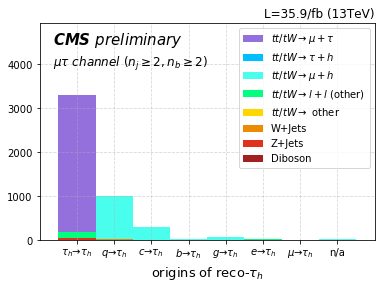

In [4]:
selection = 'mutau'
pmng = PlotterManager(selection,'>1')
df_list = pmng.getDataFrameList()

v,a,b,step,xl = 'tauGenFlavor',-1.5,8,1,r'origins of reco-$\tau_h$'
#v,a,b,step,xl = 'lepton1_idstd',-0.5,2.5,0.1,'lepton1_idstd'

mybin         = np.arange(a,b,step)
variable_list = [mc[v].values for mc in df_list]
weight_list   = [mc['eventWeight'].values for mc in df_list]

for q in variable_list:
    np.place(q, q<=3, [1])
    np.place(q, q==4, [2])
    np.place(q, q==5, [3])
    np.place(q, q==21,[4])
    np.place(q, q==11,[5])
    np.place(q, q==13,[6])
    np.place(q, q==15,[0])
    np.place(q, q==26,[7])
            

plt.figure(facecolor='w')
# 1.1. show MC
mc = plt.hist(variable_list, weights = weight_list,
            label   = pmng.labelList,
            color   = pmng.colorList,
            bins    = mybin,
            lw=0, alpha=1, 
            histtype='stepfilled', 
            )
mc = mc[0][-1] # keep only the stacked histogram, ignore the bin edges

a+=0.5
plt.grid(True,linestyle='--',alpha=0.5)
plt.xlim(a, b)
plt.ylim(0,1.5*mc.max())
plt.text(0.04*b+0.96*a, 1.35*mc.max(), r'CMS $preliminary$',style='italic',fontsize='15',fontweight='bold')
plt.text(0.04*b+0.96*a, 1.2*mc.max(), r'$\mu\tau$ channel $(n_j\geq 2,n_b\geq2 )$ ',style='italic',fontsize='12')

plt.xticks(np.arange(8),[r'$\tau_h\to\tau_h$',
                         r'$q\to\tau_h$',
                         r'$c\to\tau_h$',
                         r'$b\to\tau_h$',
                         r'$g\to\tau_h$',
                         r'$e\to\tau_h$',
                         r'$\mu\to\tau_h$',
                         'n/a'])
plt.legend()
plt.xlabel(xl,fontsize=13)


plt.title('L=35.9/fb (13TeV)',loc='right')
plt.savefig(common.getBaseDirectory()+'plots/misid/origin_{}_2b.png'.format(selection), dpi=300)

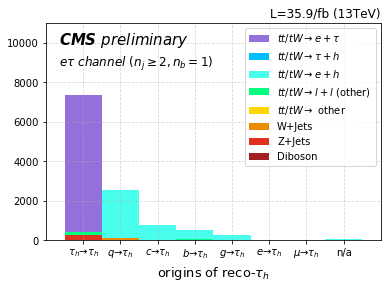

In [11]:

selection = 'etau'
pmng = PlotterManager(selection,'==1')
df_list = pmng.getDataFrameList()

v,a,b,step,xl = 'tauGenFlavor',-1.5,8,1,r'origins of reco-$\tau_h$'

mybin         = np.arange(a,b,step)
variable_list = [mc[v].values for mc in df_list]
weight_list   = [mc['eventWeight'].values for mc in df_list]

for q in variable_list:
    np.place(q, q<=3, [1])
    np.place(q, q==4, [2])
    np.place(q, q==5, [3])
    np.place(q, q==21,[4])
    np.place(q, q==11,[5])
    np.place(q, q==13,[6])
    np.place(q, q==15,[0])
    np.place(q, q==26,[7])
            

plt.figure(facecolor='w')
# 1.1. show MC
mc = plt.hist(variable_list, weights = weight_list,
            label   = pmng.labelList,
            color   = pmng.colorList,
            bins    = mybin,
            lw=0, alpha=1, 
            histtype='stepfilled', 
            )
mc = mc[0][-1] # keep only the stacked histogram, ignore the bin edges

a+=0.5
plt.grid(True,linestyle='--',alpha=0.5)
plt.xlim(a, b)
plt.ylim(0,1.5*mc.max())
plt.text(0.04*b+0.96*a, 1.35*mc.max(), r'CMS $preliminary$',style='italic',fontsize='15',fontweight='bold')
plt.text(0.04*b+0.96*a, 1.2*mc.max(), r'$e \tau$ channel $(n_j\geq 2,n_b=1 )$ ',style='italic',fontsize='12')


plt.xticks(np.arange(8),[r'$\tau_h\to\tau_h$',
                         r'$q\to\tau_h$',
                         r'$c\to\tau_h$',
                         r'$b\to\tau_h$',
                         r'$g\to\tau_h$',
                         r'$e\to\tau_h$',
                         r'$\mu\to\tau_h$',
                         'n/a'])
plt.legend()
plt.xlabel(xl,fontsize=13)
#plt.yscale('log')


plt.title('L=35.9/fb (13TeV)',loc='right')
plt.savefig(common.getBaseDirectory()+'plots/misid/origin_{}_1b.png'.format(selection), dpi=300)

In [19]:
selection = 'mutau'
pmng = PlotterManager(selection,'==1')
df_list = pmng.getDataFrameList()
mctt = df_list[-1]

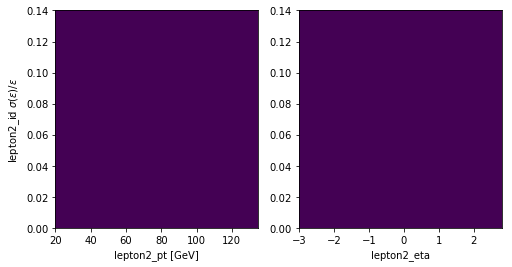

In [20]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.hist2d(mctt.lepton2_pt,mctt.lepton2_idstd,
           bins=(np.arange(20,140,5),np.arange(0,0.15,0.01)))
plt.xlabel('lepton2_pt [GeV]')
plt.ylabel(r'lepton2_id $\sigma(\epsilon)/\epsilon$')

plt.subplot(122)
plt.hist2d(mctt.lepton2_eta,mctt.lepton2_idstd,
           bins=(np.arange(-3,3,0.2),np.arange(0,0.15,0.01)))
plt.xlabel('lepton2_eta')

plt.savefig(common.getBaseDirectory()+'plots/electron_EffID_{}.png'.format(selection), dpi=300)

In [23]:
mctt.lepton1_recostd.mean()

0.00043807810291097206